In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import math

In [13]:
# Load the data into a pandas dataframe
df = pd.read_csv("../preproccesed.csv")

In [ ]:

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

# Split the training data into inputs and outputs
train_inputs = train_df[['insulation_thickness', 'u_values']]
train_outputs = train_df['annual_energy_use']

# Split the test data into inputs and outputs
test_inputs = test_df[['insulation_thickness', 'u_values']]
test_outputs = test_df['annual_energy_use']

# Define the parameter grids for grid search for both models
lin_reg_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

dt_reg_grid = {
    'criterion': ['mse', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
}

# Define the simple linear regression model
lin_reg = LinearRegression()

# Define the decision tree regression model
dt_reg = DecisionTreeRegressor()

# Use grid search to find the best parameters for the linear regression model
lin_reg_grid_search = GridSearchCV(lin_reg, lin_reg_grid, cv=5, scoring='neg_mean_squared_error')
lin_reg_grid_search.fit(train_inputs, train_outputs)

# Use grid search to find the best parameters for the decision tree regression model
dt_reg_grid_search = GridSearchCV(dt_reg, dt_reg_grid, cv=5, scoring='neg_mean_squared_error')
dt_reg_grid_search.fit(train_inputs, train_outputs)

# Make predictions using the linear regression model
lin_reg_predictions = lin_reg_grid_search.predict(test_inputs)

# Make predictions using the decision tree regression model
dt_reg_predictions = dt_reg_grid_search.predict(test_inputs)

# Calculate the errors for the predictions of both models
lin_reg_rmse = math.sqrt(mean_squared_error(test_outputs, lin_reg_predictions))
dt_reg_rmse = math.sqrt(mean_squared_error(test_outputs, dt_reg_predictions))

lin_reg_mae = mean_absolute_error(test_outputs, lin_reg_predictions)
dt_reg_mae = mean_absolute_error(test_outputs, dt_reg_predictions)

lin_reg_r2 = r2_score(test_outputs, lin_reg_predictions)
dt_reg_r2 = r2_score(test_outputs, dt_reg_predictions)



In [15]:
print('lin_reg_mse',lin_reg_rmse)
print('dt_reg_mse',dt_reg_rmse)


print('\nlin_reg_mae',lin_reg_mae)
print('dt_reg_mae',dt_reg_mae)


print('\nlin_reg_r2',lin_reg_r2)
print('dt_reg_r2',dt_reg_r2)

lin_reg_mse 100.46631925802062
dt_reg_mse 24.3203892512709

lin_reg_mae 71.94979827098878
dt_reg_mae 15.535238095238098

lin_reg_r2 0.9168756474507498
dt_reg_r2 0.9951288855260766


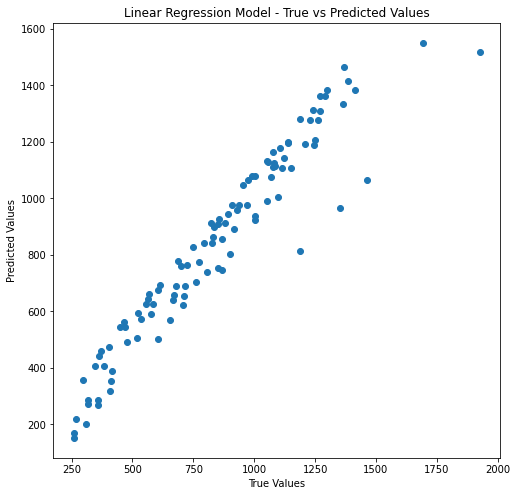

In [16]:
#Plot the scatter plot for true vs predicted values using the decision tree regression model
plt.figure(figsize=(8,8))
plt.scatter(test_outputs, lin_reg_predictions)
plt.title('Linear Regression Model - True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig('../plots/lin_reg_pred_true.png')
plt.show()

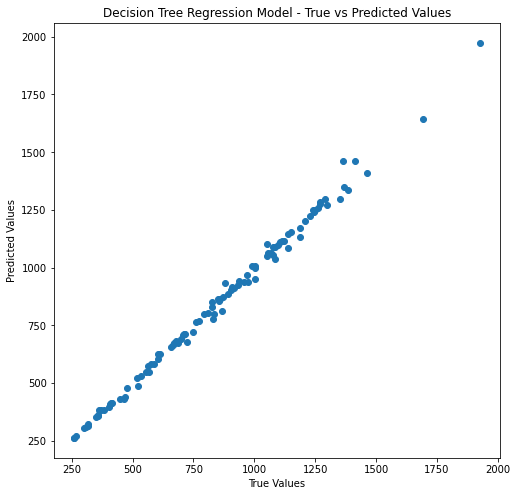

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(test_outputs, dt_reg_predictions)
plt.title('Decision Tree Regression Model - True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.savefig('../plots/dt_reg_pred_true.png')
plt.show()
